In [1]:
import calculate_evaluations
import importlib

In [2]:
import numpy as np
importlib.reload(calculate_evaluations)
import sqlite_connector
conn = sqlite_connector.get_db('../')

hrefs, change = calculate_evaluations.two_yr_change(conn, 2017)
print(np.mean(change))

change1 = calculate_evaluations.one_yr_change(conn, 2016, hrefs)
print(f'mean of year 2016 = {np.mean(change1)}')

0.15726236871813237
mean of year 2016 = 0.11957491149182174


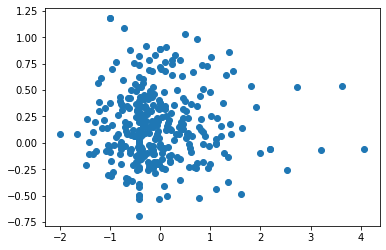

In [3]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(change1.reshape(-1,1))[:,0]

filter_idx = X < 5

plt.scatter(X[filter_idx], change[filter_idx])
plt.show()

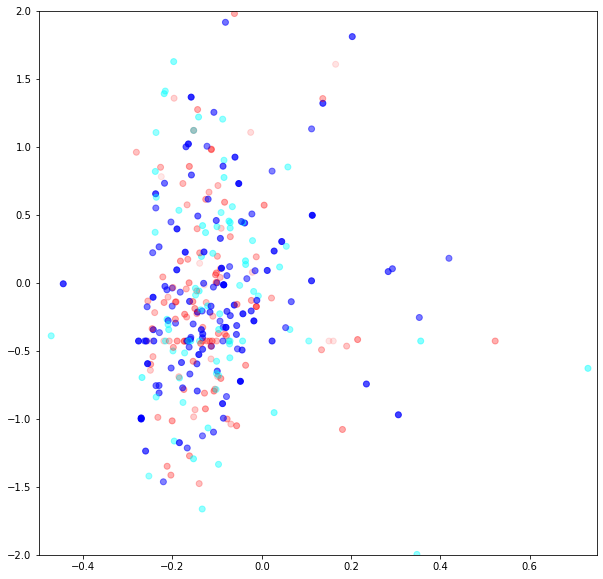

In [4]:
importlib.reload(calculate_evaluations)

kgvs = calculate_evaluations.kgv(conn, 2017, hrefs)
kgvs_s = StandardScaler().fit_transform(kgvs.reshape(-1,1))[:,0]

min_c = np.min(change)
delta = np.max(change) - min_c
alphas = (change - min_c) / delta
colors = np.empty((len(change), 3))
colors[change <= 0.2] = [1, 0, 0]
colors[(change > 0.2) & (change <= 0)] = [1, 1, 0]
colors[(change > 0) & (change <= 0.2)] = [0, 1, 1]
colors[change > 0.2] = [0,0,1]

plt.figure(figsize=(10,10))
plt.scatter(kgvs_s, X, c = colors, alpha=alphas)
plt.axis([-0.5, 0.75, -2, 2])
plt.show()


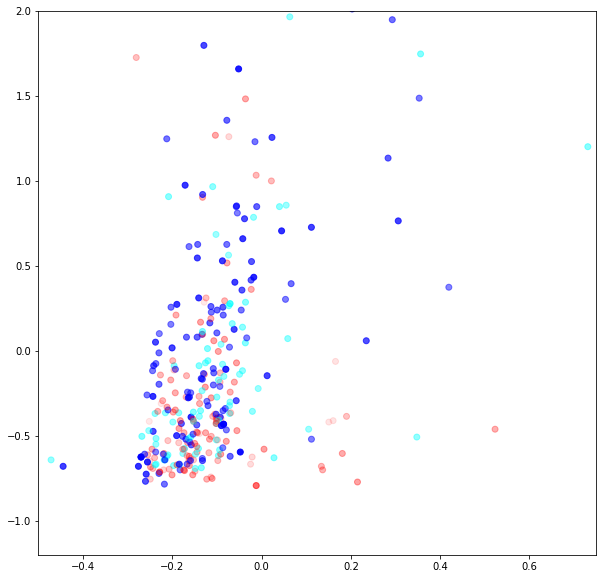

['3m', 'abb', 'abbott_laboratories', 'accenture', 'acs_actividades_de_construccion_y_servicios_sa', 'adecco_group', 'adidas', 'adidas_adr', 'ahold_delhaize', 'air_france-klm']
[4.42 1.63 4.1  2.26 0.29 0.54 1.61 1.15 0.36 0.22]


In [12]:
importlib.reload(calculate_evaluations)

kuvs = calculate_evaluations.kuv(conn, 2017, hrefs)
kuvs_s = StandardScaler().fit_transform(kuvs.reshape(-1,1))[:,0]

plt.figure(figsize=(10,10))
plt.scatter(kgvs_s, kuvs_s, c = colors, alpha=alphas)
plt.axis([-0.5, 0.75, -1.2, 2])
plt.show()
print(hrefs[:10])
print(kuvs[:10])


In [11]:
importlib.reload(sqlite_connector)
importlib.reload(calculate_evaluations)

kbvs = calculate_evaluations.kbv(conn, 2017, hrefs)
print(hrefs[:10])
print(kbvs[:10])


['3m', 'abb', 'abbott_laboratories', 'accenture', 'acs_actividades_de_construccion_y_servicios_sa', 'adecco_group', 'adidas', 'adidas_adr', 'ahold_delhaize', 'air_france-klm']
[12.03980783  3.64381444  3.61100772  8.55710113  1.95942304  3.56683417
  5.3086216   3.79187257  1.49244562  1.88120066]


In [16]:
importlib.reload(sqlite_connector)
importlib.reload(calculate_evaluations)

divs_r = calculate_evaluations.div_rend(conn, 2017, hrefs)
print(hrefs[:3])
print(divs_r[:3])


['3m', 'abb', 'abbott_laboratories']
[0.01996382 0.03076781 0.01891899]
